In [52]:
import pandas as pd
import xml.etree.ElementTree as ET
from datetime import datetime

# Function to parse the XML file and extract step count records
def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    step_counts = []

    for record in root.findall('.//Record'):
        if record.get('type') == 'HKQuantityTypeIdentifierStepCount':
            date_str = record.get('creationDate').split(' ')[0]  # Extract only the date part
            step_count = int(record.get('value'))
            step_counts.append({'Date': date_str, 'StepCount': step_count})

    return step_counts

# Function to sum step counts by date
def aggregate_steps(step_data):
    df = pd.DataFrame(step_data)
    df['Date'] = pd.to_datetime(df['Date'])
    grouped_df = df.groupby('Date').sum().reset_index()
    return grouped_df

# File path
file_path = 'export.xml'

# Parse XML, aggregate step counts by date, and convert to DataFrame
step_data = parse_xml(file_path)
df = aggregate_steps(step_data)

# Display the DataFrame
print(df)


           Date  StepCount
0    2018-11-26        233
1    2018-11-27       2510
2    2018-11-28       3009
3    2018-11-29       1372
4    2018-11-30       2699
...         ...        ...
1824 2023-12-01       9275
1825 2023-12-02       8514
1826 2023-12-03      11746
1827 2023-12-04       4883
1828 2023-12-05        263

[1829 rows x 2 columns]


In [24]:
# Load weather data
weather_df = pd.read_csv('Istanbul,Turkey 2022-12-05 to 2023-12-05.csv')
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])  # Convert to date-only

# Convert 'Date' column to datetime64[ns] for proper comparison
df['Date'] = pd.to_datetime(df['Date'])

# Load step count data (assuming it's already been processed as per previous discussion)
# step_df = ... # Use the DataFrame created in the previous steps

# Filter step count data from 5th December 2022 to 2023
start_date = pd.to_datetime("2022-12-05")
end_date = pd.to_datetime("2023-12-05")
filtered_step_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Merge the dataframes
combined_df = pd.merge(filtered_step_df, weather_df, left_on='Date', right_on='datetime', how='left')

# Drop the extra datetime column if needed
combined_df = combined_df.drop('datetime', axis=1)

# Rename columns
combined_df = combined_df.rename(columns={'temp': 'TemperatureC', 'precip': 'PrecipitationMM', 'windspeed': 'WindSpeedKMH'})

# Display the combined DataFrame
print(combined_df)

          Date  StepCount  TemperatureC  PrecipitationMM  WindSpeedKMH
0   2022-12-05      12416          11.5            0.697          17.6
1   2022-12-06      15364          11.4            0.652          14.8
2   2022-12-07      13489          11.1            0.000          11.2
3   2022-12-08      15715          12.7            0.000           8.7
4   2022-12-09      19555          14.9            0.289          11.2
..         ...        ...           ...              ...           ...
356 2023-12-01       9275          15.5            0.000          16.1
357 2023-12-02       8514          17.9            0.000          35.9
358 2023-12-03      11746          18.4            0.060          35.5
359 2023-12-04       4883          10.2            9.323          26.3
360 2023-12-05        263          10.1            1.655          24.3

[361 rows x 5 columns]


In [53]:
# Checking for missing values
print("Missing Values:")
print(combined_df.isnull().sum())

# Reviewing data types
print("\nData Types:")
print(combined_df.dtypes)

# Check for duplicates in the dataset
duplicate_rows = combined_df[combined_df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Values:
Date               0
StepCount          0
TemperatureC       0
PrecipitationMM    0
WindSpeedKMH       0
dtype: int64

Data Types:
Date               datetime64[ns]
StepCount                   int64
TemperatureC              float64
PrecipitationMM           float64
WindSpeedKMH              float64
dtype: object

Duplicate Rows:
Empty DataFrame
Columns: [Date, StepCount, TemperatureC, PrecipitationMM, WindSpeedKMH]
Index: []


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Statistics
print("Basic Statistics:")
print(combined_df.describe())

Basic Statistics:
                                Date     StepCount  TemperatureC  \
count                            361    361.000000    361.000000   
mean   2023-06-03 04:19:16.786703616   6170.927978     16.642659   
min              2022-12-05 00:00:00    263.000000      1.300000   
25%              2023-03-05 00:00:00   3039.000000     10.600000   
50%              2023-06-03 00:00:00   5308.000000     16.500000   
75%              2023-09-01 00:00:00   8045.000000     22.600000   
max              2023-12-05 00:00:00  32773.000000     31.200000   
std                              NaN   4228.022957      6.888219   

       PrecipitationMM  WindSpeedKMH  
count       361.000000    361.000000  
mean          2.133180     20.834903  
min           0.000000      5.100000  
25%           0.000000     14.800000  
50%           0.000000     21.000000  
75%           1.082000     25.800000  
max          68.873000     53.600000  
std           6.069501      7.427756  


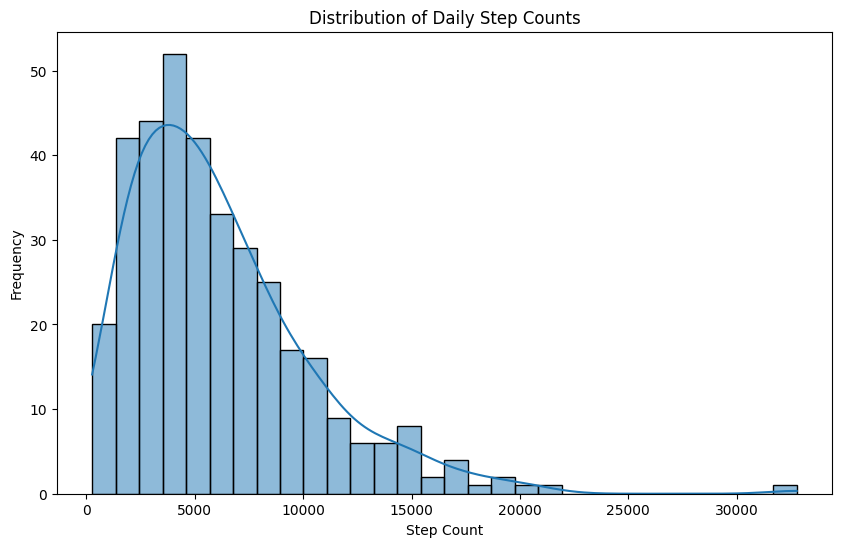

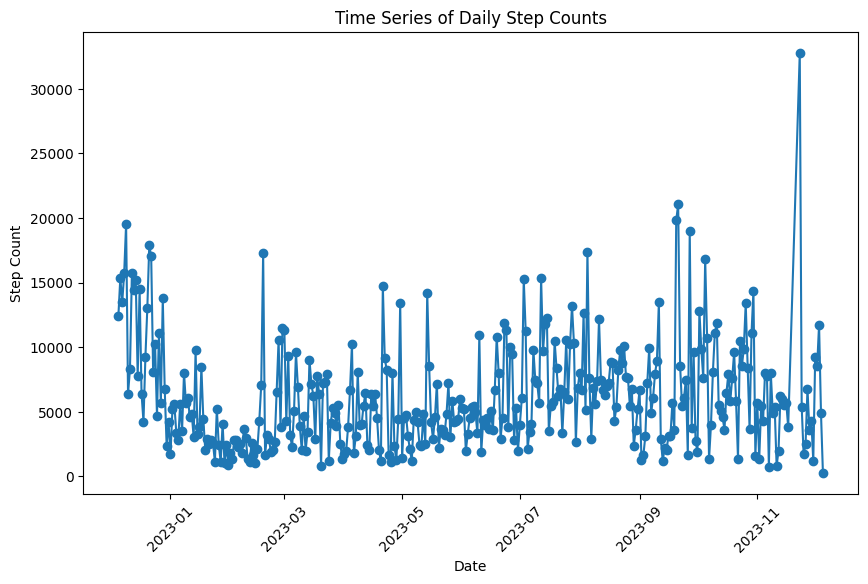

In [55]:
# Data Visualization
# Histogram of Step Counts
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['StepCount'], bins=30, kde=True)
plt.title('Distribution of Daily Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot of Step Counts
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'], combined_df['StepCount'], marker='o')
plt.title('Time Series of Daily Step Counts')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.show()

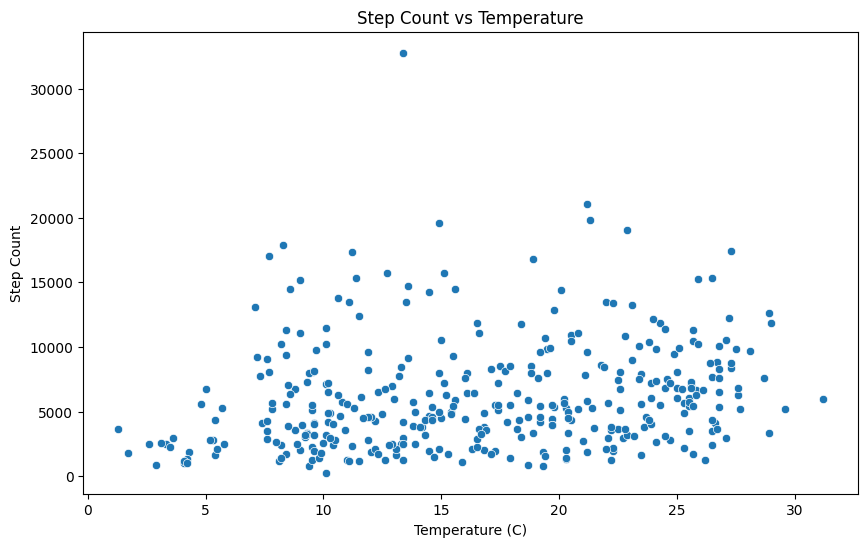

In [56]:
# Scatter plots to visualize relationships
# Replace 'TemperatureC' with other weather variables to examine different relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TemperatureC', y='StepCount', data=combined_df)
plt.title('Step Count vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Step Count')
plt.show()

Correlation Matrix:
                     Date  StepCount  TemperatureC  PrecipitationMM  \
Date             1.000000   0.076134      0.647589         0.079641   
StepCount        0.076134   1.000000      0.192126        -0.048955   
TemperatureC     0.647589   0.192126      1.000000        -0.213928   
PrecipitationMM  0.079641  -0.048955     -0.213928         1.000000   
WindSpeedKMH     0.216513  -0.020508      0.138310         0.227896   

                 WindSpeedKMH  
Date                 0.216513  
StepCount           -0.020508  
TemperatureC         0.138310  
PrecipitationMM      0.227896  
WindSpeedKMH         1.000000  


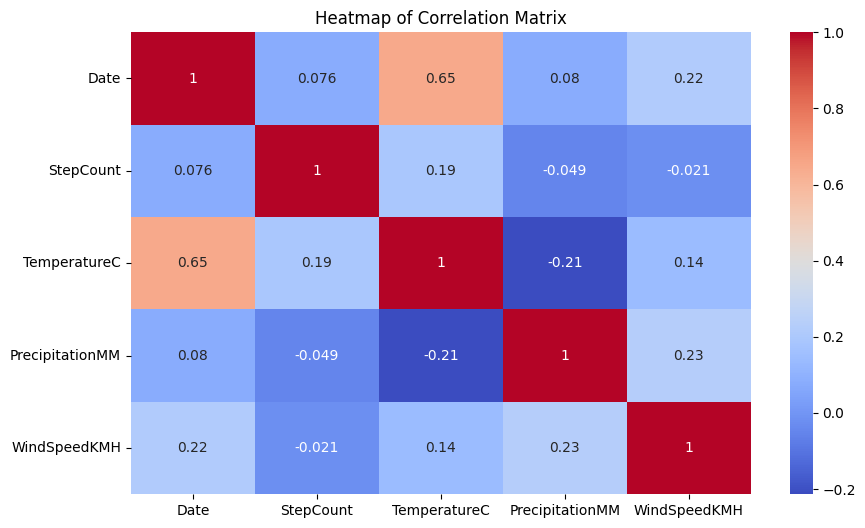

In [26]:
# 3. Correlation Analysis
correlation_matrix = combined_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

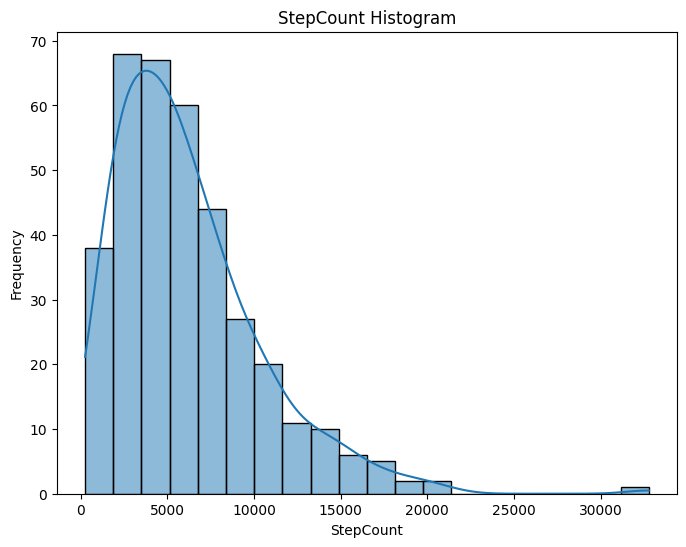

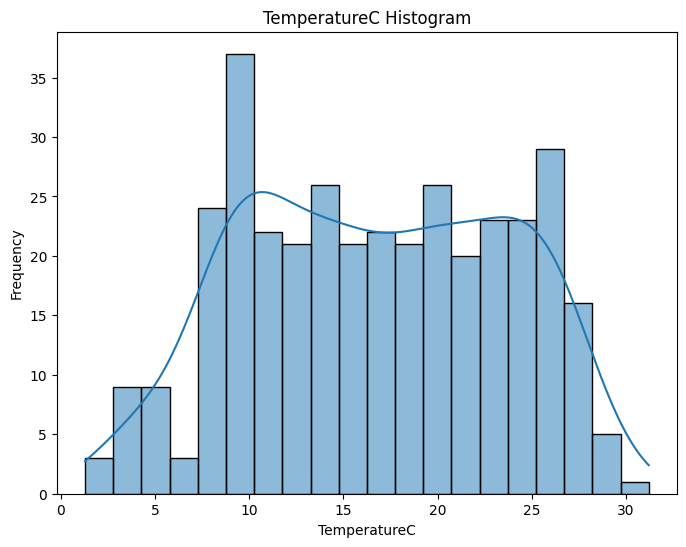

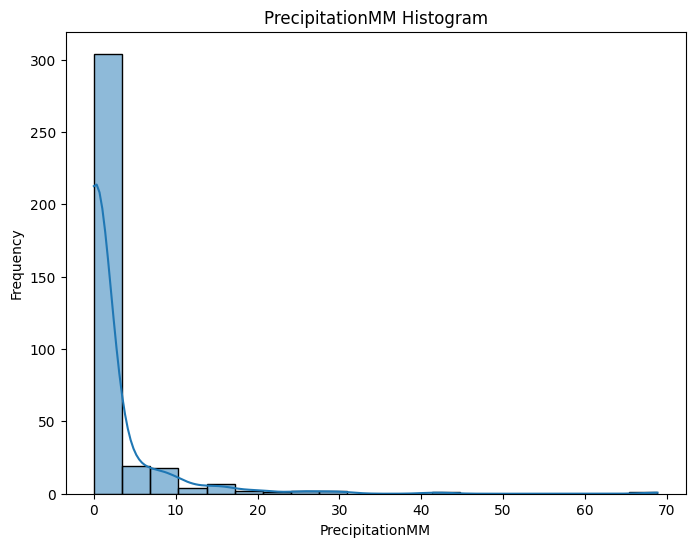

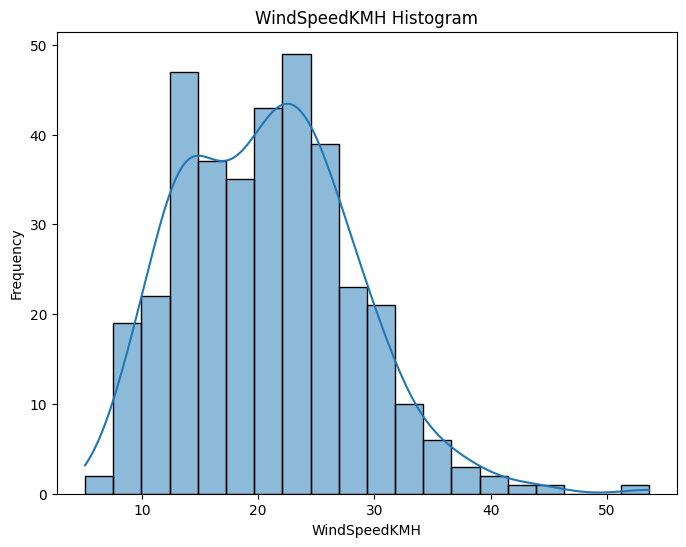

In [57]:
# Plot histogram for StepCount
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['StepCount'], bins=20, kde=True)
plt.title('StepCount Histogram')
plt.xlabel('StepCount')
plt.ylabel('Frequency')
plt.savefig('stepcount_histogram.png')
plt.show()

# Plot histogram for TemperatureC
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['TemperatureC'], bins=20, kde=True)
plt.title('TemperatureC Histogram')
plt.xlabel('TemperatureC')
plt.ylabel('Frequency')
plt.savefig('temperature_histogram.png')
plt.show()

# Plot histogram for PrecipitationMM
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['PrecipitationMM'], bins=20, kde=True)
plt.title('PrecipitationMM Histogram')
plt.xlabel('PrecipitationMM')
plt.ylabel('Frequency')
plt.savefig('precipitation_histogram.png')
plt.show()

# Plot histogram for WindSpeedKMH
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['WindSpeedKMH'], bins=20, kde=True)
plt.title('WindSpeedKMH Histogram')
plt.xlabel('WindSpeedKMH')
plt.ylabel('Frequency')
plt.savefig('windspeed_histogram.png')
plt.show()

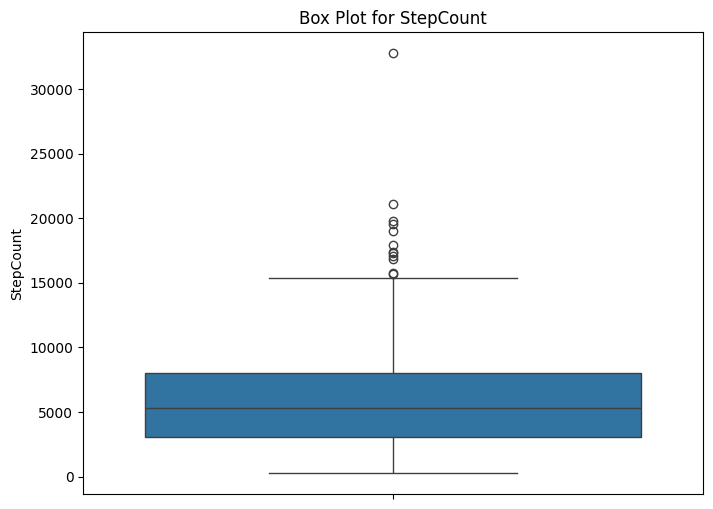

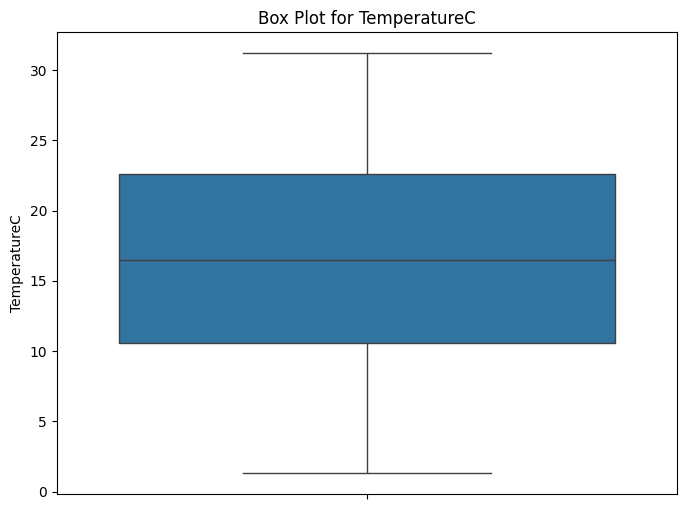

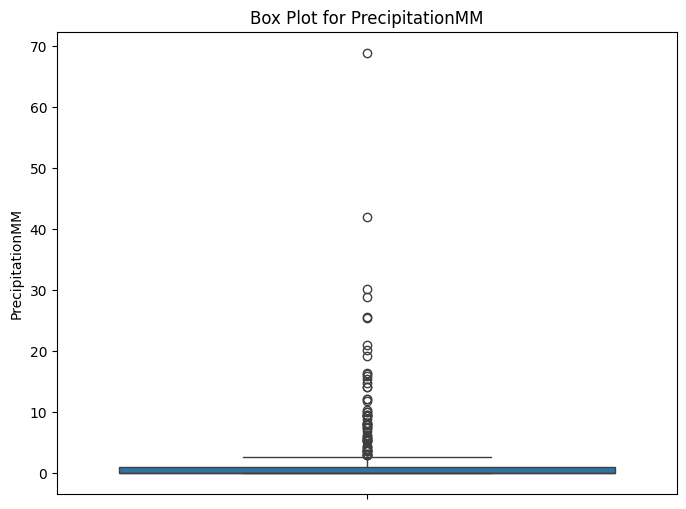

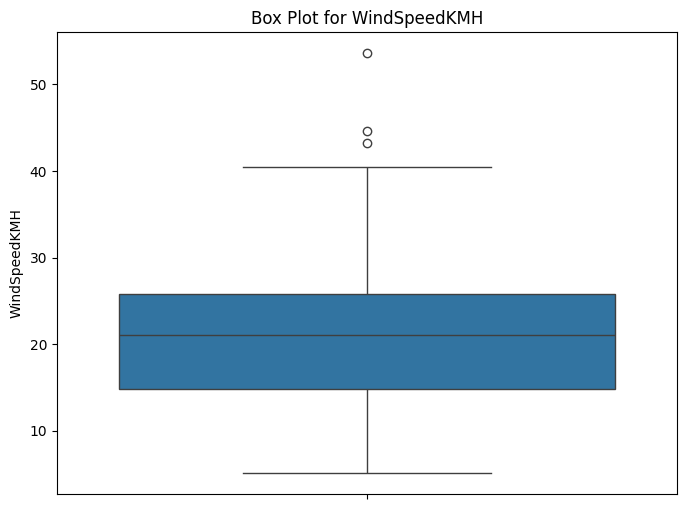

In [58]:
# Plot box plot for StepCount
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['StepCount'])
plt.title('Box Plot for StepCount')
plt.ylabel('StepCount')
plt.savefig('stepcount_boxplot.png')
plt.show()

# Plot box plot for TemperatureC
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['TemperatureC'])
plt.title('Box Plot for TemperatureC')
plt.ylabel('TemperatureC')
plt.savefig('temperature_boxplot.png')
plt.show()

# Plot box plot for PrecipitationMM
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['PrecipitationMM'])
plt.title('Box Plot for PrecipitationMM')
plt.ylabel('PrecipitationMM')
plt.savefig('precipitation_boxplot.png')
plt.show()

# Plot box plot for WindSpeedKMH
plt.figure(figsize=(8, 6))
sns.boxplot(y=combined_df['WindSpeedKMH'])
plt.title('Box Plot for WindSpeedKMH')
plt.ylabel('WindSpeedKMH')
plt.savefig('windspeed_boxplot.png')
plt.show()


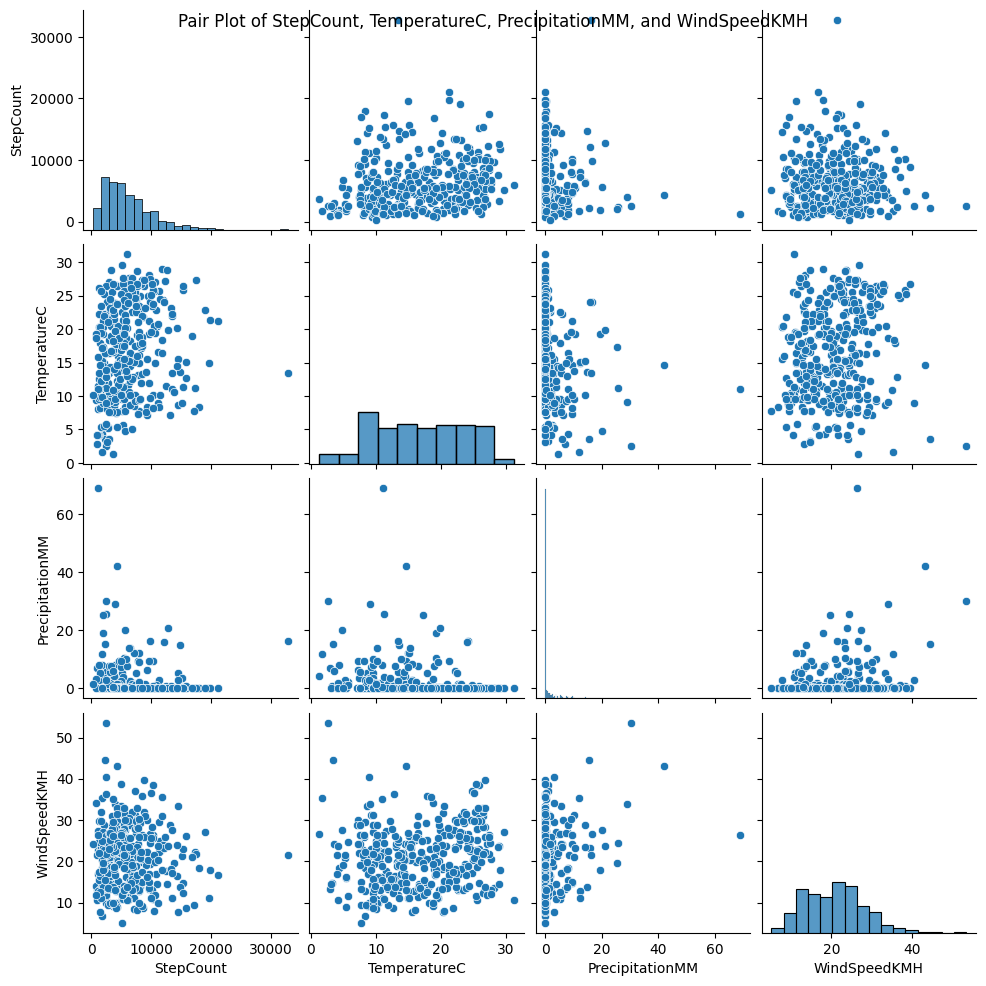

In [33]:
# Pair plot of selected variables
sns.pairplot(combined_df[['StepCount', 'TemperatureC', 'PrecipitationMM', 'WindSpeedKMH']])
plt.suptitle('Pair Plot of StepCount, TemperatureC, PrecipitationMM, and WindSpeedKMH')
plt.savefig('pair_plot.png')
plt.show()


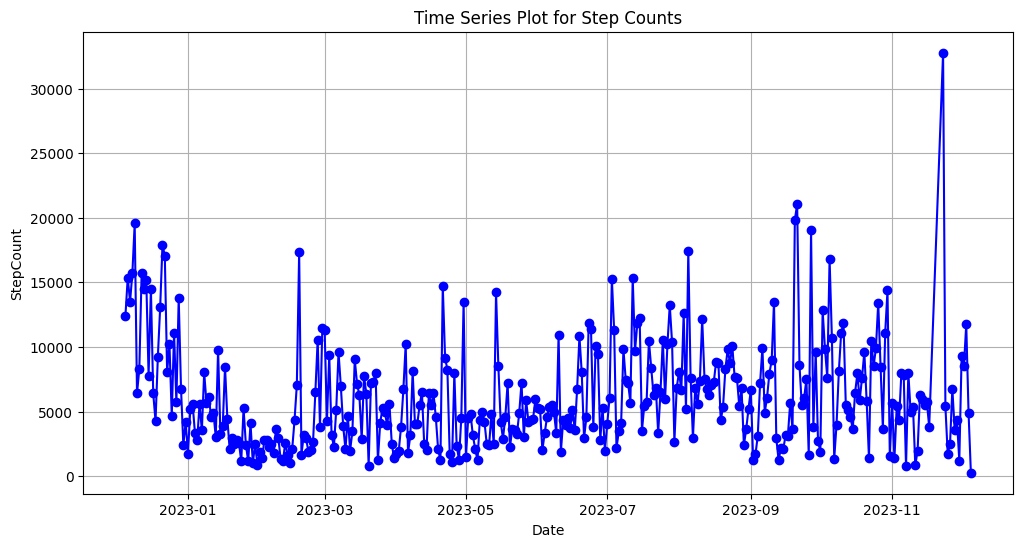

In [59]:
# Assuming 'Date' is already a datetime column
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['StepCount'], marker='o', linestyle='-', color='b')
plt.title('Time Series Plot for Step Counts')
plt.xlabel('Date')
plt.ylabel('StepCount')
plt.grid(True)
plt.savefig('time_series_stepcount.png')
plt.show()

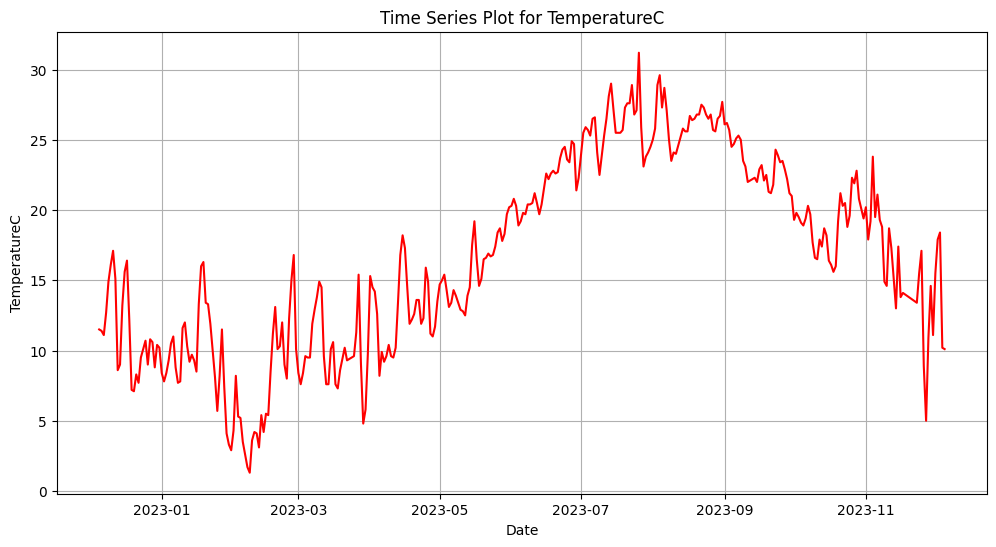

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['TemperatureC'], linestyle='-', color='r')
plt.title('Time Series Plot for TemperatureC')
plt.xlabel('Date')
plt.ylabel('TemperatureC')
plt.grid(True)
plt.savefig('time_series_temperature.png')
plt.show()


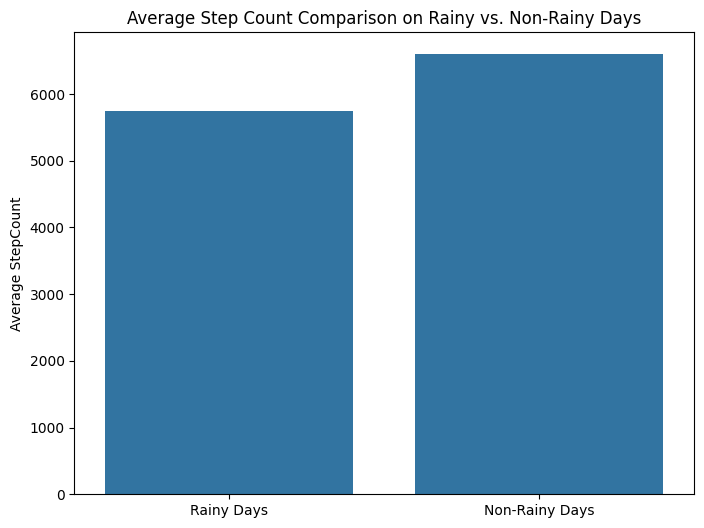

In [43]:
# Group data by rainy and non-rainy days
rainy_days = combined_df[combined_df['PrecipitationMM'] > 0]
non_rainy_days = combined_df[combined_df['PrecipitationMM'] == 0]

# Calculate average step counts for rainy and non-rainy days
avg_step_count_rainy = rainy_days['StepCount'].mean()
avg_step_count_non_rainy = non_rainy_days['StepCount'].mean()

# Create a bar plot to compare average step counts on rainy vs. non-rainy days
plt.figure(figsize=(8, 6))
sns.barplot(x=['Rainy Days', 'Non-Rainy Days'], y=[avg_step_count_rainy, avg_step_count_non_rainy])
plt.title('Average Step Count Comparison on Rainy vs. Non-Rainy Days')
plt.ylabel('Average StepCount')
plt.savefig('stepcount_comparison.png')
plt.show()

In [61]:
from scipy.stats import ttest_ind

# Perform t-test for Hypothesis 1
t_statistic, p_value = ttest_ind(
    rainy_days['StepCount'],
    non_rainy_days['StepCount'],
    equal_var=False  # Assume unequal variances
)

# Determine significance level (e.g., alpha = 0.05)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Hypothesis 1: There is a significant difference in average step counts (Rainy vs. Non-Rainy Days)")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")
else:
    print("Hypothesis 1: There is no significant difference in average step counts (Rainy vs. Non-Rainy Days)")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

Hypothesis 1: There is no significant difference in average step counts (Rainy vs. Non-Rainy Days)
T-Statistic: -1.931588034117151
P-Value: 0.05419973541700542


In [62]:
from scipy.stats import pearsonr

# Perform correlation analysis for Hypothesis 2
correlation_coefficient, p_value = pearsonr(combined_df['TemperatureC'], combined_df['StepCount'])

# Determine significance level (e.g., alpha = 0.05)

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Hypothesis 2: Temperature significantly impacts step counts (Positive Correlation)")
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-Value: {p_value}")
else:
    print("Hypothesis 2: Temperature does not significantly impact step counts")
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-Value: {p_value}")

Hypothesis 2: Temperature significantly impacts step counts (Positive Correlation)
Pearson Correlation Coefficient: 0.19212647291895546
P-Value: 0.00024065130665919206


In [48]:
import numpy as np
from scipy import stats

# Calculate the Z-Scores for StepCount
z_scores = np.abs(stats.zscore(combined_df['StepCount']))

# Define a threshold for identifying anomalies (e.g., 3 standard deviations)
threshold = 3

# Identify anomalies based on the threshold
anomalies_zscore = combined_df[z_scores > threshold]

# Print the identified anomalies
print("Anomalies detected using Z-Score method:")
print(anomalies_zscore)

Anomalies detected using Z-Score method:
          Date  StepCount  TemperatureC  PrecipitationMM  WindSpeedKMH
4   2022-12-09      19555          14.9            0.289          11.2
289 2023-09-20      19817          21.3            0.000          17.8
290 2023-09-21      21075          21.2            0.000          16.7
296 2023-09-27      19037          22.9            0.000          27.1
348 2023-11-23      32773          13.4           16.194          21.4


In [63]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the model on StepCount data
iso_forest.fit(combined_df[['StepCount']])

# Predict anomalies
anomaly_predictions = iso_forest.predict(combined_df[['StepCount']])

# Create a boolean mask for anomalies (True for anomalies, False for normal data points)
anomalies_isoforest = combined_df[anomaly_predictions == -1]

# Print the identified anomalies
print("Anomalies detected using Isolation Forest:")
print(anomalies_isoforest)


Anomalies detected using Isolation Forest:
          Date  StepCount  TemperatureC  PrecipitationMM  WindSpeedKMH
3   2022-12-08      15715          12.7            0.000           8.7
4   2022-12-09      19555          14.9            0.289          11.2
7   2022-12-12      15720          15.1            0.974          26.1
9   2022-12-14      15194           9.0            3.650          21.3
16  2022-12-21      17902           8.3            0.281          18.3
17  2022-12-22      17055           7.7            0.000           9.4
75  2023-02-18      17325          11.2            0.000          22.3
105 2023-03-20        811           9.4            1.371          14.0
137 2023-04-21      14753          13.6           14.863          13.7
210 2023-07-03      15276          25.9            0.000          23.0
243 2023-08-05      17402          27.3            0.000          21.7
289 2023-09-20      19817          21.3            0.000          17.8
290 2023-09-21      21075         